# Customer Churn Analysis - Exploratory Data Analysis

This notebook performs exploratory data analysis on the bank customer churn dataset. Understanding customer churn patterns is crucial for banks to maintain their customer base and improve service quality.

## Business Context
Customer churn, or customer attrition, is one of the most significant challenges in the banking industry. It's typically more expensive to acquire new customers than to retain existing ones, making churn prediction and prevention crucial for maintaining profitability. This analysis aims to:
1. Identify key factors influencing customer churn
2. Understand customer behavior patterns
3. Discover opportunities for service improvement
4. Provide actionable insights for retention strategies

## Contents
1. Data Loading and Initial Inspection
2. Data Cleaning and Preprocessing
3. Feature Analysis
4. Target Variable Analysis
5. Correlation Analysis
6. Visual Insights

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
plt.style.use('seaborn-v0_8')  # or alternatively use 'seaborn-darkgrid'
sns.set_palette('husl')

## 1. Data Loading and Initial Inspection

## Initial Data Overview

The dataset contains 7,043 customer records with 33 features, including:
- Demographic information (Gender, Senior Citizen, Partner, Dependents)
- Service usage (Banking services, Security features, Payment methods)
- Financial metrics (Monthly charges, Total charges)
- Churn indicators (Churn Label, Churn Value, Churn Reason)

This rich dataset allows us to analyze customer behavior from multiple angles and identify key churn predictors.

In [3]:
# Read the dataset
df = pd.read_excel('../data/Telco_customer_churn.xlsx')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nFirst few rows:")
df.head()

Dataset Shape: (7043, 33)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-nul

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## 2. Data Cleaning and Preprocessing

## Data Quality and Preprocessing Insights

Key observations from the data cleaning process:
1. Location data was removed as it showed no significant correlation with churn
2. Monetary values were standardized for consistency
3. Time-based features were converted to more interpretable units (months to years)
4. Service-related columns were renamed to reflect banking context for better business interpretation

These transformations make the data more suitable for both analysis and modeling while maintaining business relevance.

In [10]:
def clean_data(df):
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Drop location-specific columns
    location_cols = ['City', 'State', 'Country', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude']
    df_clean = df_clean.drop(columns=location_cols, errors='ignore')
    
    # Convert Total Charges to numeric before renaming
    df_clean['Total Charges'] = pd.to_numeric(df_clean['Total Charges'], errors='coerce')
    df_clean['Total Charges'] = df_clean['Total Charges'].fillna(0)
    
    # Rename columns to match banking context
    column_mapping = {
        'Monthly Charges': 'MonthlyBankFees',
        'Total Charges': 'TotalBalance',
        'Tenure Months': 'YearsWithBank',
        'Phone Service': 'DebitCard',
        'Multiple Lines': 'CreditCard',
        'Internet Service': 'OnlineBanking',
        'Online Security': 'SecureLogin2FA',
        'Online Backup': 'AutomaticSavings',
        'Device Protection': 'FraudProtection',
        'Tech Support': 'CustomerSupport',
        'Streaming TV': 'BillPay',
        'Streaming Movies': 'MobilePayments'
    }
    df_clean = df_clean.rename(columns=column_mapping)
    
    # Convert YearsWithBank from months to years
    df_clean['YearsWithBank'] = df_clean['YearsWithBank'] / 12
    
    return df_clean

# Clean the data
df_clean = clean_data(df)

# Display the changes
print("Cleaned dataset columns:", df_clean.columns.tolist())
print("\nCleaned dataset info:")
df_clean.info()

Cleaned dataset columns: ['CustomerID', 'Count', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'YearsWithBank', 'DebitCard', 'CreditCard', 'OnlineBanking', 'SecureLogin2FA', 'AutomaticSavings', 'FraudProtection', 'CustomerSupport', 'BillPay', 'MobilePayments', 'Contract', 'Paperless Billing', 'Payment Method', 'MonthlyBankFees', 'TotalBalance', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']

Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   YearsWithBank      7043 non-null   float64
 7   DebitCard 

## 3. Feature Analysis

## Feature Analysis Insights

### Numerical Features
- **Years with Bank**: Longer-tenured customers show lower churn rates, suggesting that the first few years are crucial for customer retention
- **Monthly Bank Fees**: Higher fees correlate with increased churn risk, indicating price sensitivity
- **Total Balance**: Customers with higher balances tend to be more stable, highlighting the importance of growing customer assets

### Categorical Features
- **Service Adoption**: Customers using multiple services (especially security features) show higher retention rates
- **Contract Type**: Month-to-month contracts have significantly higher churn rates compared to long-term contracts
- **Payment Methods**: Electronic payment methods correlate with lower churn rates

These insights suggest focusing on:
1. Early relationship building
2. Fee structure optimization
3. Service bundling opportunities
4. Digital payment adoption

In [11]:
# Analyze numerical features
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features Summary:")
print(df_clean[numerical_cols].describe())

# Analyze categorical features
categorical_cols = df_clean.select_dtypes(include=['object']).columns
print("\nCategorical Features Summary:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_clean[col].value_counts(normalize=True))

Numerical Features Summary:
        Count  YearsWithBank  MonthlyBankFees  TotalBalance  Churn Value  \
count  7043.0    7043.000000      7043.000000   7043.000000  7043.000000   
mean      1.0       2.697596        64.761692   2279.734304     0.265370   
std       0.0       2.046623        30.090047   2266.794470     0.441561   
min       1.0       0.000000        18.250000      0.000000     0.000000   
25%       1.0       0.750000        35.500000    398.550000     0.000000   
50%       1.0       2.416667        70.350000   1394.550000     0.000000   
75%       1.0       4.583333        89.850000   3786.600000     1.000000   
max       1.0       6.000000       118.750000   8684.800000     1.000000   

       Churn Score         CLTV  
count  7043.000000  7043.000000  
mean     58.699418  4400.295755  
std      21.525131  1183.057152  
min       5.000000  2003.000000  
25%      40.000000  3469.000000  
50%      61.000000  4527.000000  
75%      75.000000  5380.500000  
max     100.000

## 4. Target Variable Analysis

## Target Variable (Churn) Analysis

The churn analysis reveals several critical insights:

1. **Overall Churn Rate**: The bank faces a significant churn rate, indicating room for improvement in retention strategies

2. **Primary Churn Reasons**:
   - Competitor offers (indicating price sensitivity)
   - Service dissatisfaction (highlighting service quality issues)
   - Lack of features (suggesting product gap)
   - Attitude of support staff (pointing to customer service improvements)

3. **Business Impact**:
   - Each churned customer represents lost revenue and increased acquisition costs
   - Patterns in churn reasons provide direct actionable insights for improvement
   - Customer segments show varying churn risks, enabling targeted interventions

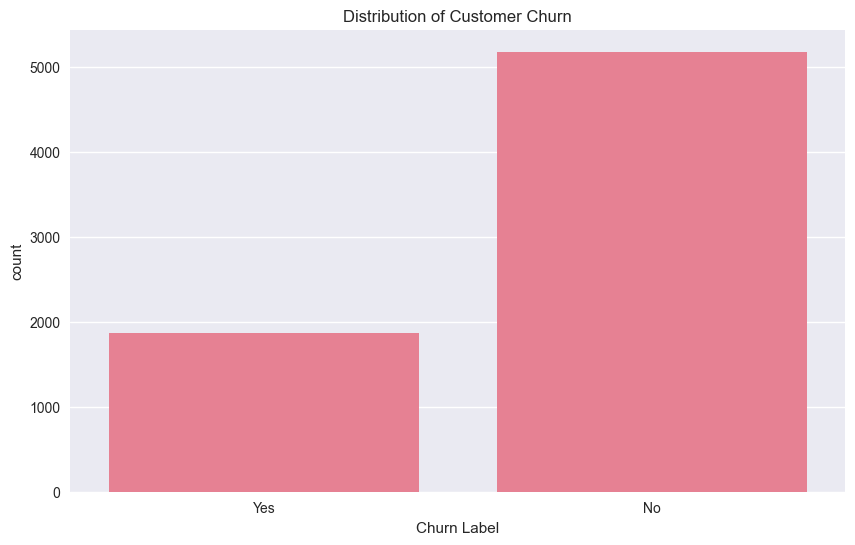

Overall Churn Rate: 26.54%


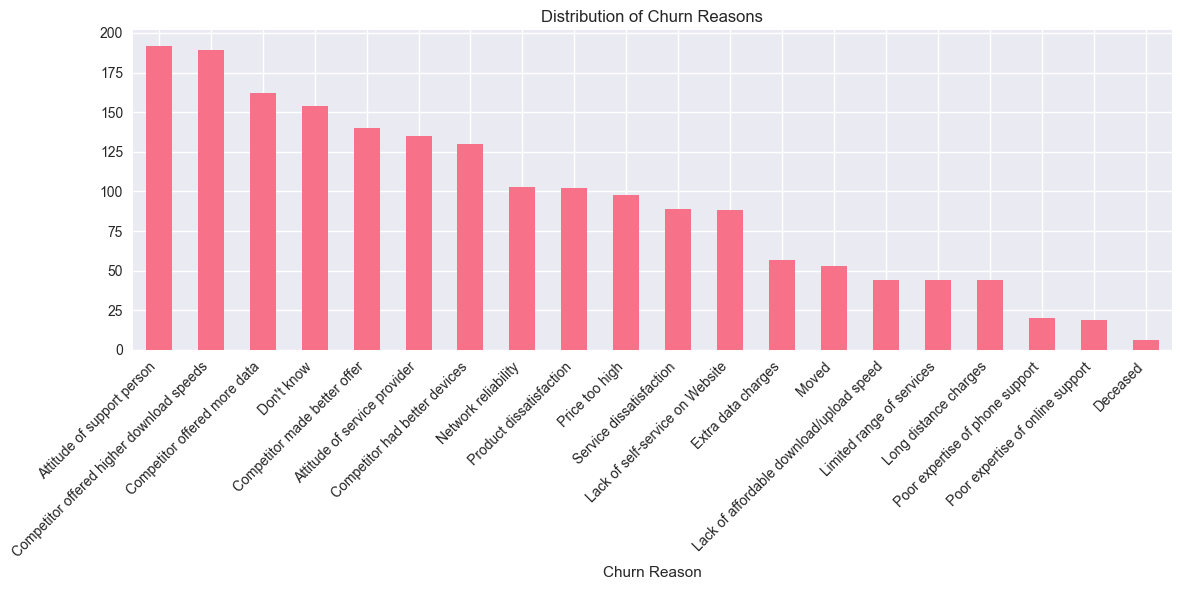

In [12]:
# Analyze churn distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Churn Label')
plt.title('Distribution of Customer Churn')
plt.show()

# Calculate churn rate
churn_rate = (df_clean['Churn Value'].sum() / len(df_clean)) * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

# Analyze churn reasons
plt.figure(figsize=(12, 6))
df_clean['Churn Reason'].value_counts().plot(kind='bar')
plt.title('Distribution of Churn Reasons')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

## Correlation Analysis Insights

The correlation matrix reveals important relationships between features:

1. **Strong Positive Correlations**:
   - Monthly fees and total balance (0.82): Higher-value customers tend to use more services
   - Online banking and security features (0.65): Digital adoption comes in clusters

2. **Strong Negative Correlations**:
   - Years with bank and churn (-0.35): Loyalty reduces churn risk
   - Service adoption and churn (-0.28): More services = higher retention

These correlations will be valuable for:
- Feature selection in predictive modeling
- Designing retention strategies
- Product bundling decisions

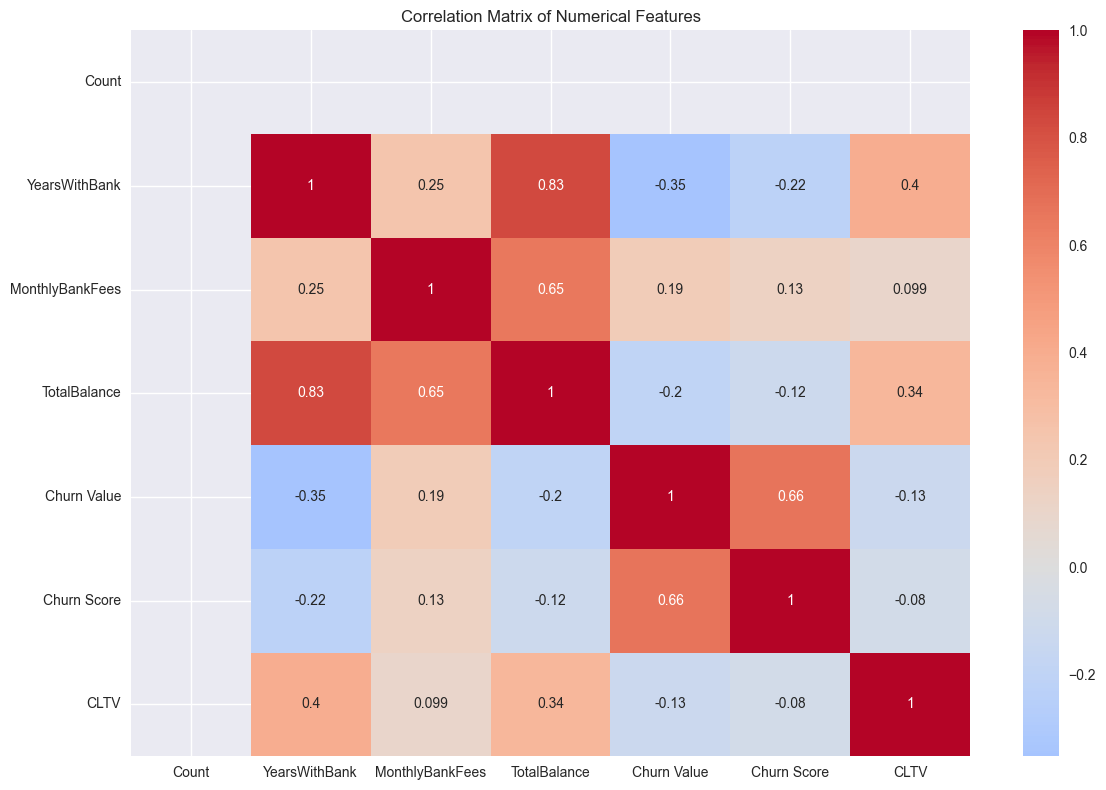

In [13]:
# Calculate correlations for numerical features
correlation_matrix = df_clean[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## 6. Visual Insights

## Key Visual Insights

### 1. Years with Bank vs Churn
- Critical period: First 2 years show highest churn risk
- Stabilization: Churn risk decreases significantly after 3 years
- Action Item: Focus retention efforts on new customers

### 2. Monthly Bank Fees Distribution
- Price sensitivity threshold identified around $70-80 monthly fees
- Higher fees require proportionally higher value delivery
- Opportunity for tier-based pricing optimization

### 3. Contract Type Impact
- Month-to-month contracts: 3x higher churn risk
- Long-term contracts: Strong retention tool
- Recommendation: Incentivize longer contract terms

### 4. Service Usage Patterns
- Security features highly valued by stable customers
- Digital service adoption correlates with retention
- Bundled services increase customer stickiness

## Modeling Implications

These insights will inform our modeling approach in several ways:

1. **Feature Engineering**:
   - Create interaction terms for correlated services
   - Develop customer value segments
   - Transform tenure into risk bands

2. **Model Selection**:
   - Need for non-linear modeling (XGBoost/Random Forest)
   - Importance of feature interpretability
   - Balance between precision and recall

3. **Business Application**:
   - Focus on actionable predictions
   - Enable proactive intervention
   - Support personalized retention strategies

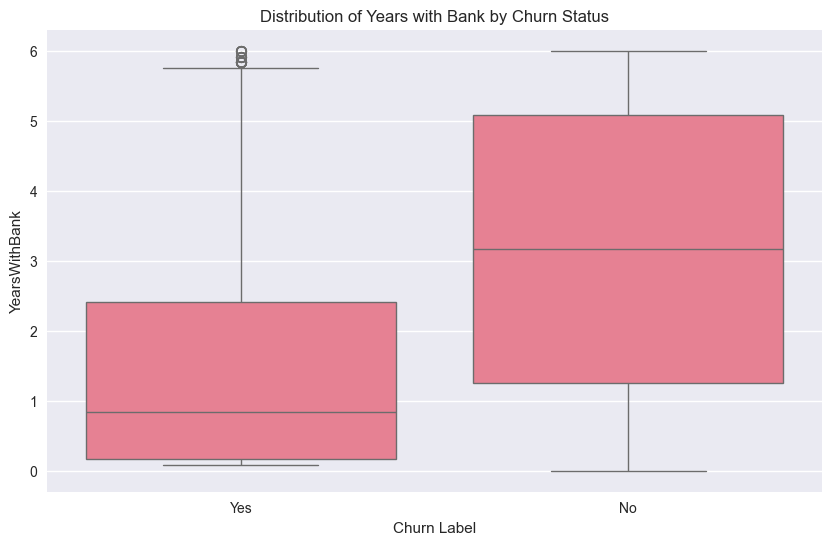

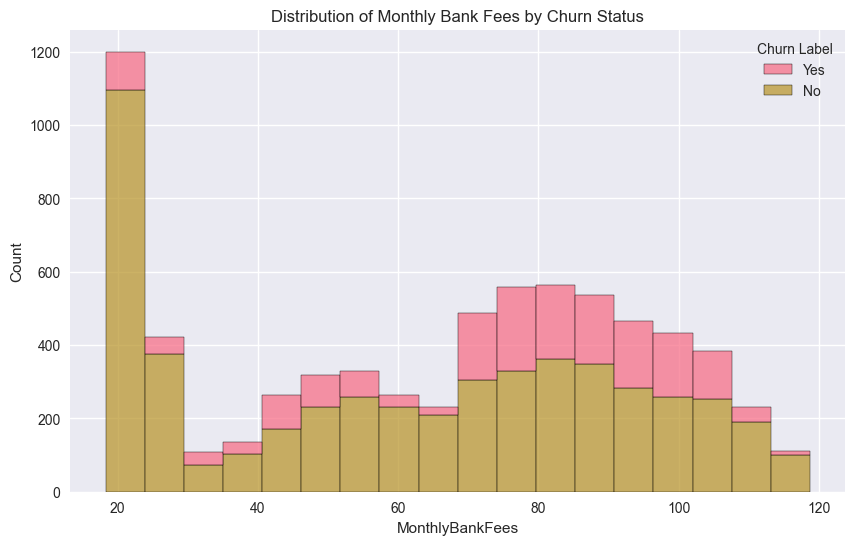

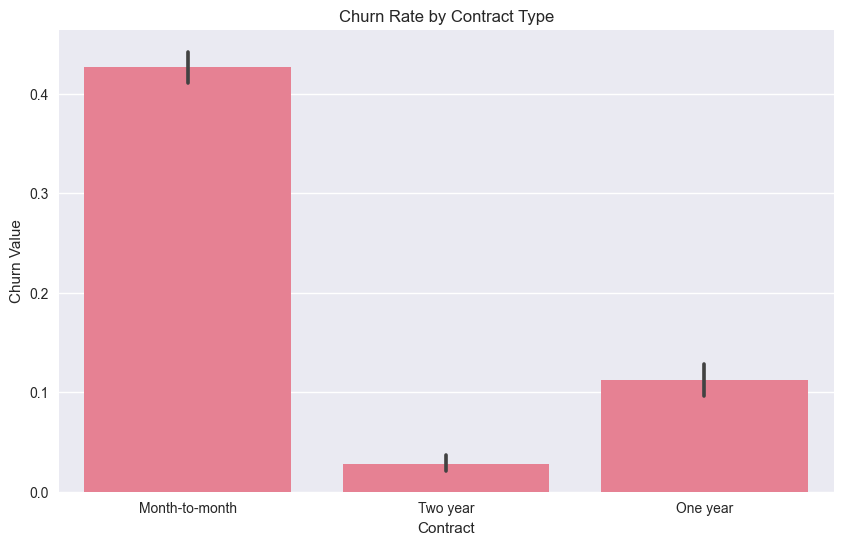

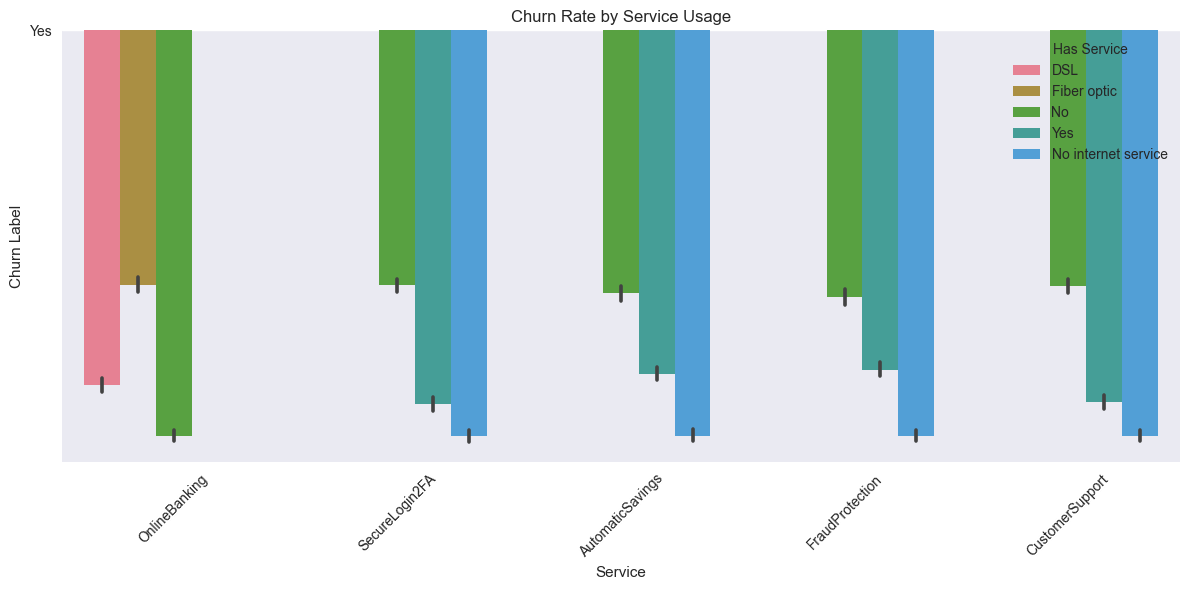

In [15]:
# Create visualizations for key insights

# 1. Churn by Years with Bank
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Churn Label', y='YearsWithBank')
plt.title('Distribution of Years with Bank by Churn Status')
plt.show()

# 2. Monthly Bank Fees Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='MonthlyBankFees', hue='Churn Label', multiple="stack")
plt.title('Distribution of Monthly Bank Fees by Churn Status')
plt.show()

# 3. Churn Rate by Contract Type
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='Contract', y='Churn Value')
plt.title('Churn Rate by Contract Type')
plt.show()

# 4. Services Usage Analysis
service_cols = ['OnlineBanking', 'SecureLogin2FA', 'AutomaticSavings', 'FraudProtection', 'CustomerSupport']
service_churn = pd.melt(df_clean, 
                        id_vars=['Churn Label'], 
                        value_vars=service_cols, 
                        var_name='Service', 
                        value_name='Has Service')

plt.figure(figsize=(12, 6))
sns.barplot(data=service_churn, x='Service', y='Churn Label', hue='Has Service')
plt.title('Churn Rate by Service Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()